In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: NLY
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


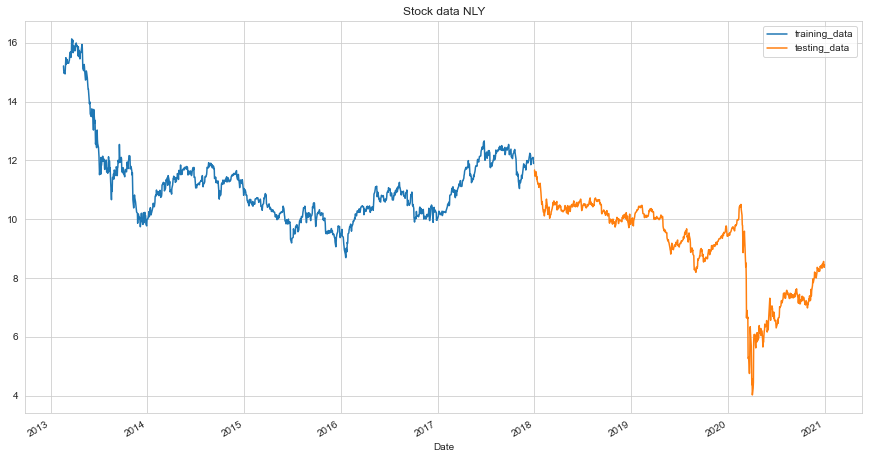

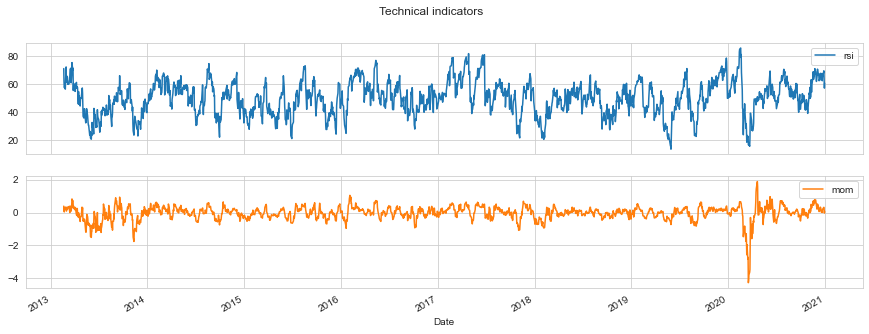

In [2]:
stock_name = 'nly'.upper()
industry = 'Real estate'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1016.30, duration: 0:00:00.268062
episode: 2/2000, episode end value: 982.90, duration: 0:00:00.265061
episode: 3/2000, episode end value: 998.78, duration: 0:00:00.243055
episode: 4/2000, episode end value: 989.67, duration: 0:00:00.233669
episode: 5/2000, episode end value: 990.10, duration: 0:00:00.247872
episode: 6/2000, episode end value: 981.06, duration: 0:00:00.235065
episode: 7/2000, episode end value: 983.51, duration: 0:00:00.224179
episode: 8/2000, episode end value: 973.56, duration: 0:00:00.221970
episode: 9/2000, episode end value: 986.97, duration: 0:00:00.218669
episode: 10/2000, episode end value: 974.62, duration: 0:00:00.219630
episode: 11/2000, episode end value: 985.21, duration: 0:00:00.220052
episode: 12/2000, episode end value: 1001.58, duration: 0:00:00.228392
episode: 13/2000, episode end value: 989.82, duration: 0:00:00.205067
episode: 14/2000, episode end value: 988.70, duration: 0:00:00.216294
episode: 15/2000, episode e

episode: 117/2000, episode end value: 1017.19, duration: 0:00:00.295601
episode: 118/2000, episode end value: 1070.80, duration: 0:00:00.275784
episode: 119/2000, episode end value: 1049.22, duration: 0:00:00.272314
episode: 120/2000, episode end value: 1023.29, duration: 0:00:00.288373
episode: 121/2000, episode end value: 1014.51, duration: 0:00:00.304244
episode: 122/2000, episode end value: 1009.74, duration: 0:00:00.296380
episode: 123/2000, episode end value: 1043.69, duration: 0:00:00.267119
episode: 124/2000, episode end value: 1037.51, duration: 0:00:00.283459
episode: 125/2000, episode end value: 1053.80, duration: 0:00:00.274536
episode: 126/2000, episode end value: 1087.28, duration: 0:00:00.261471
episode: 127/2000, episode end value: 1063.42, duration: 0:00:00.283793
episode: 128/2000, episode end value: 1039.06, duration: 0:00:00.302119
episode: 129/2000, episode end value: 1017.43, duration: 0:00:00.298628
episode: 130/2000, episode end value: 1073.13, duration: 0:00:00

episode: 231/2000, episode end value: 1072.49, duration: 0:00:00.309975
episode: 232/2000, episode end value: 1022.22, duration: 0:00:00.454038
episode: 233/2000, episode end value: 1088.58, duration: 0:00:00.300067
episode: 234/2000, episode end value: 1033.44, duration: 0:00:00.343822
episode: 235/2000, episode end value: 1049.98, duration: 0:00:00.337227
episode: 236/2000, episode end value: 1076.30, duration: 0:00:00.289534
episode: 237/2000, episode end value: 1096.39, duration: 0:00:00.312071
episode: 238/2000, episode end value: 1088.26, duration: 0:00:00.377080
episode: 239/2000, episode end value: 1040.53, duration: 0:00:00.407095
episode: 240/2000, episode end value: 1078.70, duration: 0:00:00.349077
episode: 241/2000, episode end value: 1009.93, duration: 0:00:00.495113
episode: 242/2000, episode end value: 1013.19, duration: 0:00:00.516118
episode: 243/2000, episode end value: 1074.77, duration: 0:00:00.473106
episode: 244/2000, episode end value: 1085.97, duration: 0:00:00

episode: 345/2000, episode end value: 1053.48, duration: 0:00:00.409562
episode: 346/2000, episode end value: 1069.19, duration: 0:00:00.501801
episode: 347/2000, episode end value: 1063.01, duration: 0:00:00.464825
episode: 348/2000, episode end value: 1086.17, duration: 0:00:00.411271
episode: 349/2000, episode end value: 1087.60, duration: 0:00:00.444197
episode: 350/2000, episode end value: 1027.55, duration: 0:00:00.452295
episode: 351/2000, episode end value: 1091.27, duration: 0:00:00.376459
episode: 352/2000, episode end value: 1075.58, duration: 0:00:00.444373
episode: 353/2000, episode end value: 1041.81, duration: 0:00:00.449688
episode: 354/2000, episode end value: 1076.17, duration: 0:00:00.472944
episode: 355/2000, episode end value: 1082.05, duration: 0:00:00.409971
episode: 356/2000, episode end value: 1055.22, duration: 0:00:00.424214
episode: 357/2000, episode end value: 1092.32, duration: 0:00:00.447381
episode: 358/2000, episode end value: 1071.75, duration: 0:00:00

episode: 459/2000, episode end value: 1027.89, duration: 0:00:00.404700
episode: 460/2000, episode end value: 1082.57, duration: 0:00:00.409730
episode: 461/2000, episode end value: 1039.16, duration: 0:00:00.413471
episode: 462/2000, episode end value: 1081.78, duration: 0:00:00.423273
episode: 463/2000, episode end value: 1045.49, duration: 0:00:00.405093
episode: 464/2000, episode end value: 1015.30, duration: 0:00:00.460318
episode: 465/2000, episode end value: 1030.25, duration: 0:00:00.488571
episode: 466/2000, episode end value: 1073.47, duration: 0:00:00.376166
episode: 467/2000, episode end value: 1057.42, duration: 0:00:00.377815
episode: 468/2000, episode end value: 1089.70, duration: 0:00:00.434448
episode: 469/2000, episode end value: 1019.59, duration: 0:00:00.464108
episode: 470/2000, episode end value: 1008.37, duration: 0:00:00.511556
episode: 471/2000, episode end value: 1078.01, duration: 0:00:00.447230
episode: 472/2000, episode end value: 1011.44, duration: 0:00:00

episode: 573/2000, episode end value: 1018.43, duration: 0:00:00.414337
episode: 574/2000, episode end value: 1090.11, duration: 0:00:00.384028
episode: 575/2000, episode end value: 1040.46, duration: 0:00:00.435854
episode: 576/2000, episode end value: 1047.94, duration: 0:00:00.370635
episode: 577/2000, episode end value: 1039.28, duration: 0:00:00.455384
episode: 578/2000, episode end value: 1055.52, duration: 0:00:00.372901
episode: 579/2000, episode end value: 1015.76, duration: 0:00:00.421762
episode: 580/2000, episode end value: 1030.99, duration: 0:00:00.518051
episode: 581/2000, episode end value: 1066.72, duration: 0:00:00.337130
episode: 582/2000, episode end value: 1094.88, duration: 0:00:00.429865
episode: 583/2000, episode end value: 1026.74, duration: 0:00:00.377376
episode: 584/2000, episode end value: 1025.92, duration: 0:00:00.436982
episode: 585/2000, episode end value: 1078.37, duration: 0:00:00.415843
episode: 586/2000, episode end value: 1078.76, duration: 0:00:00

episode: 687/2000, episode end value: 1086.10, duration: 0:00:00.424997
episode: 688/2000, episode end value: 1087.74, duration: 0:00:00.367892
episode: 689/2000, episode end value: 1017.85, duration: 0:00:00.461803
episode: 690/2000, episode end value: 1103.48, duration: 0:00:00.333160
episode: 691/2000, episode end value: 1080.77, duration: 0:00:00.382068
episode: 692/2000, episode end value: 1047.91, duration: 0:00:00.419758
episode: 693/2000, episode end value: 1047.44, duration: 0:00:00.410542
episode: 694/2000, episode end value: 1009.12, duration: 0:00:00.485377
episode: 695/2000, episode end value: 1032.01, duration: 0:00:00.486791
episode: 696/2000, episode end value: 1069.49, duration: 0:00:00.427861
episode: 697/2000, episode end value: 1037.88, duration: 0:00:00.416815
episode: 698/2000, episode end value: 1052.01, duration: 0:00:00.403377
episode: 699/2000, episode end value: 1048.20, duration: 0:00:00.453607
episode: 700/2000, episode end value: 1011.87, duration: 0:00:00

episode: 801/2000, episode end value: 1041.67, duration: 0:00:00.490416
episode: 802/2000, episode end value: 1096.97, duration: 0:00:00.337974
episode: 803/2000, episode end value: 1086.00, duration: 0:00:00.415229
episode: 804/2000, episode end value: 1009.43, duration: 0:00:00.517213
episode: 805/2000, episode end value: 1086.19, duration: 0:00:00.328823
episode: 806/2000, episode end value: 1080.29, duration: 0:00:00.337911
episode: 807/2000, episode end value: 1078.50, duration: 0:00:00.355484
episode: 808/2000, episode end value: 1091.11, duration: 0:00:00.466074
episode: 809/2000, episode end value: 1062.01, duration: 0:00:00.365295
episode: 810/2000, episode end value: 1050.12, duration: 0:00:00.410002
episode: 811/2000, episode end value: 1054.76, duration: 0:00:00.412198
episode: 812/2000, episode end value: 1054.89, duration: 0:00:00.477700
episode: 813/2000, episode end value: 1101.58, duration: 0:00:00.353246
episode: 814/2000, episode end value: 1027.17, duration: 0:00:00

episode: 915/2000, episode end value: 1077.85, duration: 0:00:00.408993
episode: 916/2000, episode end value: 1087.96, duration: 0:00:00.424208
episode: 917/2000, episode end value: 1012.97, duration: 0:00:00.414613
episode: 918/2000, episode end value: 1095.18, duration: 0:00:00.366670
episode: 919/2000, episode end value: 1088.60, duration: 0:00:00.369238
episode: 920/2000, episode end value: 1078.16, duration: 0:00:00.473159
episode: 921/2000, episode end value: 1025.06, duration: 0:00:00.519123
episode: 922/2000, episode end value: 1050.87, duration: 0:00:00.531136
episode: 923/2000, episode end value: 1055.01, duration: 0:00:00.394413
episode: 924/2000, episode end value: 1089.16, duration: 0:00:00.416859
episode: 925/2000, episode end value: 1048.61, duration: 0:00:00.427821
episode: 926/2000, episode end value: 1093.38, duration: 0:00:00.335391
episode: 927/2000, episode end value: 1016.20, duration: 0:00:00.434069
episode: 928/2000, episode end value: 1090.30, duration: 0:00:00

episode: 1029/2000, episode end value: 1072.52, duration: 0:00:00.400817
episode: 1030/2000, episode end value: 1042.91, duration: 0:00:00.460845
episode: 1031/2000, episode end value: 1092.07, duration: 0:00:00.388957
episode: 1032/2000, episode end value: 1045.33, duration: 0:00:00.469833
episode: 1033/2000, episode end value: 1037.23, duration: 0:00:00.406078
episode: 1034/2000, episode end value: 1070.02, duration: 0:00:00.452015
episode: 1035/2000, episode end value: 1077.71, duration: 0:00:00.355769
episode: 1036/2000, episode end value: 1062.72, duration: 0:00:00.467157
episode: 1037/2000, episode end value: 1081.07, duration: 0:00:00.431992
episode: 1038/2000, episode end value: 1019.85, duration: 0:00:00.493442
episode: 1039/2000, episode end value: 1081.45, duration: 0:00:00.446363
episode: 1040/2000, episode end value: 1020.24, duration: 0:00:00.409343
episode: 1041/2000, episode end value: 1088.91, duration: 0:00:00.432867
episode: 1042/2000, episode end value: 1069.11, dur

episode: 1142/2000, episode end value: 1082.90, duration: 0:00:00.428680
episode: 1143/2000, episode end value: 1082.95, duration: 0:00:00.391398
episode: 1144/2000, episode end value: 1057.33, duration: 0:00:00.380849
episode: 1145/2000, episode end value: 1089.01, duration: 0:00:00.395784
episode: 1146/2000, episode end value: 1082.77, duration: 0:00:00.412091
episode: 1147/2000, episode end value: 1072.96, duration: 0:00:00.438173
episode: 1148/2000, episode end value: 1048.35, duration: 0:00:00.489025
episode: 1149/2000, episode end value: 1037.23, duration: 0:00:00.404589
episode: 1150/2000, episode end value: 1030.33, duration: 0:00:00.449818
episode: 1151/2000, episode end value: 1013.15, duration: 0:00:00.477005
episode: 1152/2000, episode end value: 1025.44, duration: 0:00:00.446870
episode: 1153/2000, episode end value: 1044.82, duration: 0:00:00.522461
episode: 1154/2000, episode end value: 1028.42, duration: 0:00:00.539515
episode: 1155/2000, episode end value: 1074.91, dur

episode: 1255/2000, episode end value: 1078.41, duration: 0:00:00.373357
episode: 1256/2000, episode end value: 1085.69, duration: 0:00:00.402472
episode: 1257/2000, episode end value: 1017.24, duration: 0:00:00.426984
episode: 1258/2000, episode end value: 1084.17, duration: 0:00:00.400133
episode: 1259/2000, episode end value: 1086.48, duration: 0:00:00.391035
episode: 1260/2000, episode end value: 1015.68, duration: 0:00:00.487851
episode: 1261/2000, episode end value: 1080.66, duration: 0:00:00.341908
episode: 1262/2000, episode end value: 1072.35, duration: 0:00:00.393841
episode: 1263/2000, episode end value: 1049.10, duration: 0:00:00.423944
episode: 1264/2000, episode end value: 1090.01, duration: 0:00:00.415679
episode: 1265/2000, episode end value: 1046.95, duration: 0:00:00.452573
episode: 1266/2000, episode end value: 1040.24, duration: 0:00:00.480675
episode: 1267/2000, episode end value: 1046.56, duration: 0:00:00.524706
episode: 1268/2000, episode end value: 1055.03, dur

episode: 1368/2000, episode end value: 1043.73, duration: 0:00:00.482051
episode: 1369/2000, episode end value: 1021.34, duration: 0:00:00.425139
episode: 1370/2000, episode end value: 1035.59, duration: 0:00:00.423431
episode: 1371/2000, episode end value: 1034.45, duration: 0:00:00.444598
episode: 1372/2000, episode end value: 1013.27, duration: 0:00:00.508567
episode: 1373/2000, episode end value: 1044.50, duration: 0:00:00.472708
episode: 1374/2000, episode end value: 1069.71, duration: 0:00:00.456569
episode: 1375/2000, episode end value: 1021.24, duration: 0:00:00.558951
episode: 1376/2000, episode end value: 1040.85, duration: 0:00:00.451614
episode: 1377/2000, episode end value: 1051.03, duration: 0:00:00.480839
episode: 1378/2000, episode end value: 1031.07, duration: 0:00:00.429796
episode: 1379/2000, episode end value: 1049.67, duration: 0:00:00.405359
episode: 1380/2000, episode end value: 1041.93, duration: 0:00:00.411692
episode: 1381/2000, episode end value: 1036.85, dur

episode: 1481/2000, episode end value: 1020.28, duration: 0:00:00.404995
episode: 1482/2000, episode end value: 1031.34, duration: 0:00:00.490256
episode: 1483/2000, episode end value: 1019.23, duration: 0:00:00.520960
episode: 1484/2000, episode end value: 1073.08, duration: 0:00:00.430875
episode: 1485/2000, episode end value: 1048.44, duration: 0:00:00.505773
episode: 1486/2000, episode end value: 1047.91, duration: 0:00:00.471574
episode: 1487/2000, episode end value: 1065.39, duration: 0:00:00.400715
episode: 1488/2000, episode end value: 1078.81, duration: 0:00:00.423034
episode: 1489/2000, episode end value: 1077.94, duration: 0:00:00.385056
episode: 1490/2000, episode end value: 1075.59, duration: 0:00:00.355634
episode: 1491/2000, episode end value: 1070.44, duration: 0:00:00.378326
episode: 1492/2000, episode end value: 1026.14, duration: 0:00:00.473261
episode: 1493/2000, episode end value: 1086.49, duration: 0:00:00.428480
episode: 1494/2000, episode end value: 1044.69, dur

episode: 1594/2000, episode end value: 1017.05, duration: 0:00:00.455682
episode: 1595/2000, episode end value: 1089.65, duration: 0:00:00.364135
episode: 1596/2000, episode end value: 1084.63, duration: 0:00:00.505416
episode: 1597/2000, episode end value: 1084.88, duration: 0:00:00.522733
episode: 1598/2000, episode end value: 1018.42, duration: 0:00:00.536503
episode: 1599/2000, episode end value: 1086.79, duration: 0:00:00.504688
episode: 1600/2000, episode end value: 1028.89, duration: 0:00:00.515355
episode: 1601/2000, episode end value: 1043.38, duration: 0:00:00.578692
episode: 1602/2000, episode end value: 1083.52, duration: 0:00:00.439894
episode: 1603/2000, episode end value: 1042.03, duration: 0:00:00.532625
episode: 1604/2000, episode end value: 1045.10, duration: 0:00:00.500889
episode: 1605/2000, episode end value: 1070.67, duration: 0:00:00.471372
episode: 1606/2000, episode end value: 1096.46, duration: 0:00:00.425633
episode: 1607/2000, episode end value: 1023.59, dur

episode: 1707/2000, episode end value: 1088.60, duration: 0:00:00.317532
episode: 1708/2000, episode end value: 1080.61, duration: 0:00:00.381353
episode: 1709/2000, episode end value: 1042.75, duration: 0:00:00.435708
episode: 1710/2000, episode end value: 1021.24, duration: 0:00:00.478457
episode: 1711/2000, episode end value: 1072.24, duration: 0:00:00.359009
episode: 1712/2000, episode end value: 1081.40, duration: 0:00:00.329655
episode: 1713/2000, episode end value: 1054.99, duration: 0:00:00.398706
episode: 1714/2000, episode end value: 1057.29, duration: 0:00:00.409213
episode: 1715/2000, episode end value: 1094.14, duration: 0:00:00.316170
episode: 1716/2000, episode end value: 1083.22, duration: 0:00:00.363367
episode: 1717/2000, episode end value: 1028.60, duration: 0:00:00.376590
episode: 1718/2000, episode end value: 1044.85, duration: 0:00:00.370843
episode: 1719/2000, episode end value: 1091.64, duration: 0:00:00.352666
episode: 1720/2000, episode end value: 1057.39, dur

episode: 1820/2000, episode end value: 973.86, duration: 0:00:00.262059
episode: 1821/2000, episode end value: 977.89, duration: 0:00:00.254381
episode: 1822/2000, episode end value: 1007.91, duration: 0:00:00.265179
episode: 1823/2000, episode end value: 993.93, duration: 0:00:00.277737
episode: 1824/2000, episode end value: 976.75, duration: 0:00:00.250468
episode: 1825/2000, episode end value: 968.78, duration: 0:00:00.282447
episode: 1826/2000, episode end value: 991.20, duration: 0:00:00.256693
episode: 1827/2000, episode end value: 975.69, duration: 0:00:00.254643
episode: 1828/2000, episode end value: 971.85, duration: 0:00:00.258712
episode: 1829/2000, episode end value: 982.02, duration: 0:00:00.290800
episode: 1830/2000, episode end value: 980.98, duration: 0:00:00.249388
episode: 1831/2000, episode end value: 988.47, duration: 0:00:00.252932
episode: 1832/2000, episode end value: 974.91, duration: 0:00:00.262038
episode: 1833/2000, episode end value: 996.12, duration: 0:00:0

episode: 1934/2000, episode end value: 1005.83, duration: 0:00:00.220941
episode: 1935/2000, episode end value: 991.55, duration: 0:00:00.239006
episode: 1936/2000, episode end value: 977.09, duration: 0:00:00.221138
episode: 1937/2000, episode end value: 976.38, duration: 0:00:00.209297
episode: 1938/2000, episode end value: 982.36, duration: 0:00:00.206986
episode: 1939/2000, episode end value: 989.58, duration: 0:00:00.215923
episode: 1940/2000, episode end value: 999.81, duration: 0:00:00.206924
episode: 1941/2000, episode end value: 985.78, duration: 0:00:00.220472
episode: 1942/2000, episode end value: 1000.94, duration: 0:00:00.237974
episode: 1943/2000, episode end value: 973.46, duration: 0:00:00.203829
episode: 1944/2000, episode end value: 991.09, duration: 0:00:00.212054
episode: 1945/2000, episode end value: 979.20, duration: 0:00:00.204428
episode: 1946/2000, episode end value: 973.76, duration: 0:00:00.200908
episode: 1947/2000, episode end value: 976.09, duration: 0:00:

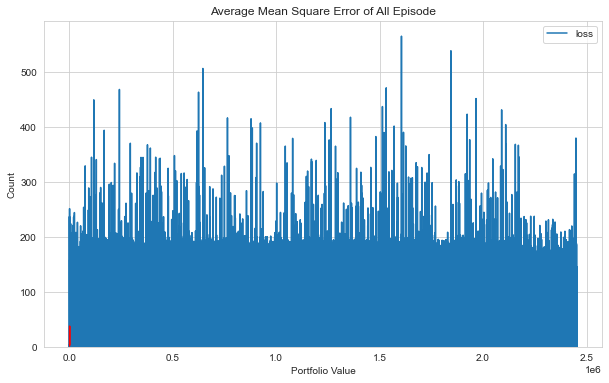

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

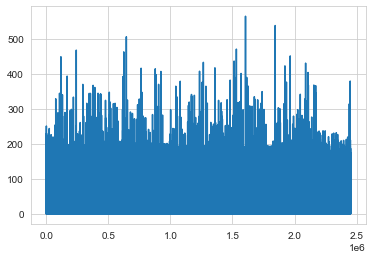

In [5]:
plt.plot(agent.model.losses)

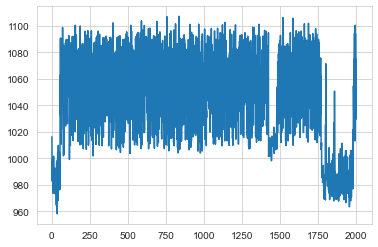

In [6]:
plt.plot(portfolio_value)

episode end value: 1116.48, duration: 0:00:00.084580
Sell: 159 times, Buy: 128 times


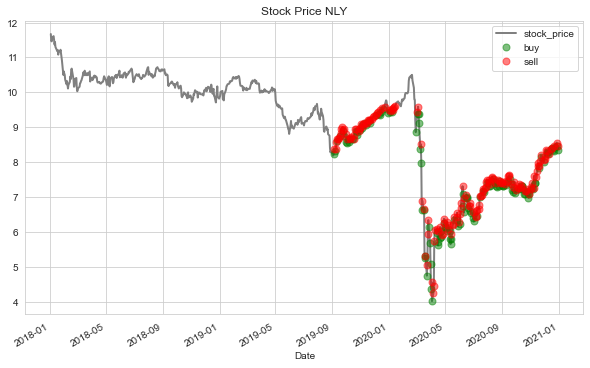

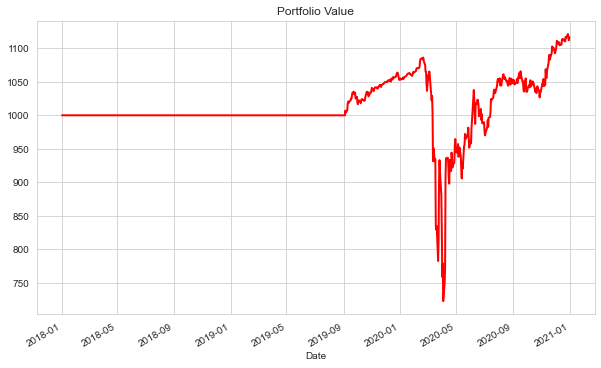

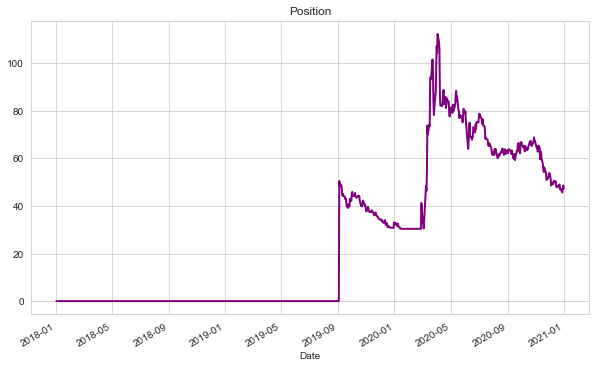

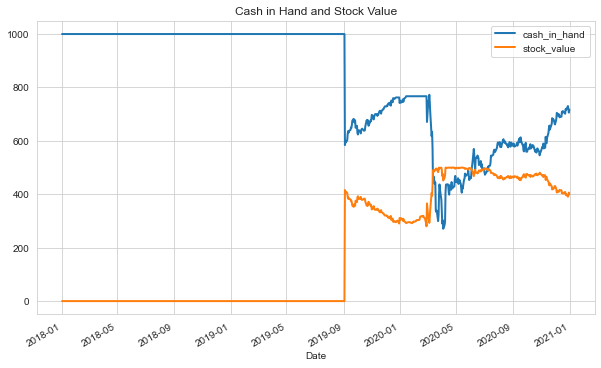

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: NLY
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 3.74 %
Volatility: 0.1941
shape ratio: 0.1360
Maximun drawdown: -33.50 %
Calmar ratio: 0.1117
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): -10.20 %
Volatility (benchmark): 0.3753
shape ratio: -0.3012
Maximun drawdown: -65.37 %
Calmar ratio (benchmark): -0.1561


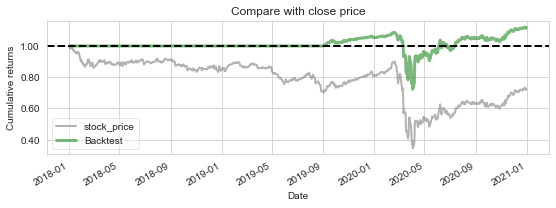

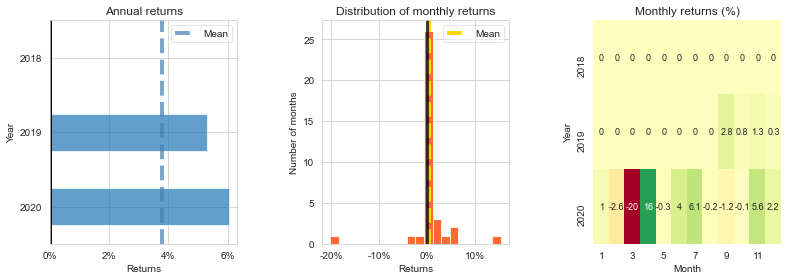

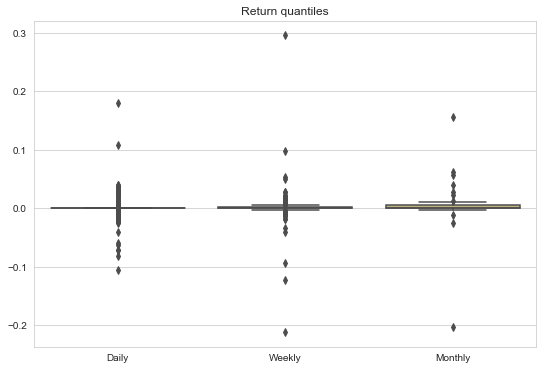

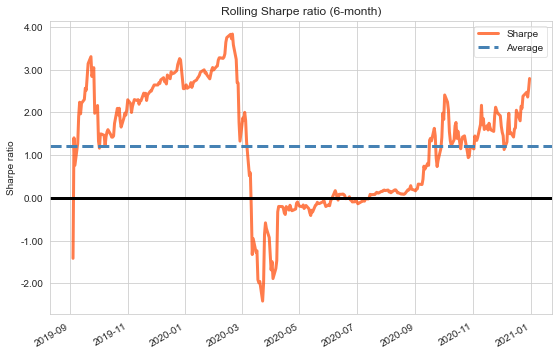

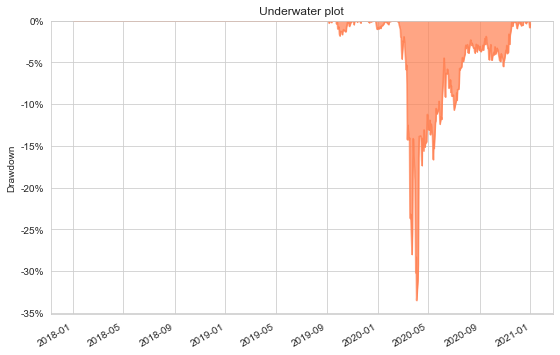

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')